# Наивная баесовская классификация

Наивные баесовские классификаторы - исключительно быстрые модели, которые могут работать с многомерными данными. Мало настраиваемых параметров, поэтому часто используются как эталонные модели.

## Баесовская классификация

Поиск вероятности метки при определенных заданных признаках, являющихся результатом наблюдений 

$P(L | признаков) = \frac{P(признаков | L) P(L)}{P(признаков)}$

Один из способов выбора между двумя метками l1 и Д2 - вычисление отношения апостериорнох вероятностей для каждой из них

$\frac{P(L_{1} | признаков)}{P(L_{2} | признаков)} = \frac{P(признаков | L_{1}) P(L_{1})}{P(признаков | L_{2}) P(L_{2})}$

Модель вычисляет $P(признаков | L_{i})$ и такая модель называется порождающей, так как определяет гипотетический случайный процесс генерации данных.

"Наивным" классификатор становится из-за того, что делается "наивное" допущение относительно порождающей модели для каждой из меток. Разные наивные классификаторы основаны на разных моделях.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Гаусов наивный классификатор (данные распределены по гаусу)

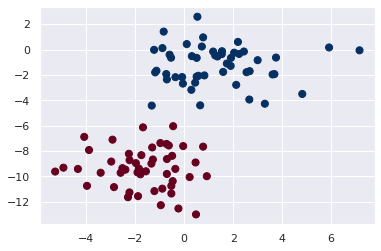

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

для обучения достаточно найти среднее значение и стандартное отклонение точек внутри каждой категории

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [4]:
# проверим
rnd = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rnd.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

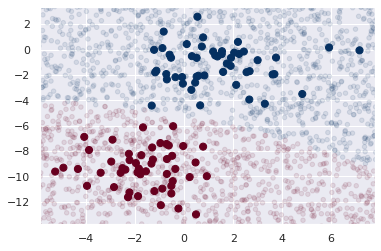

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

Плюс классификатора - возможность расчитать естественную вероятность классификации predict_proba

In [6]:
yprob = model.predict_proba(Xnew)
yprob.round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Полиномиальный наивный баесовский классификатор

допущение - признаки распределены  на основе простого полиномиального распределения. Полин.распределение описывает вероятность наблюдения количеств вхождений в несколько категорий, поэтому классификатор лучше всего подходит для **признаков, отражающих количество или частоту вхождения**

In [7]:
# классификаиця текстов по частоте вхождения слов
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [10]:
# векторизуем каждую строку в вектор с помощью TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.18, 0.5, 'predicted label')

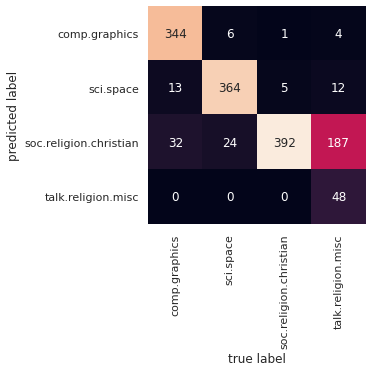

In [12]:
# матрица различий между настоящими и предсказанными метками
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [13]:
# предсказание для каждой отдельной строки
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [14]:
predict_category('sending a payload to the ISS')

'sci.space'

In [15]:
predict_category('religious people wait for ctistmas')

'soc.religion.christian'

## Когда использовать наивный баес?

- выполняют обучение и предсказание очень быстро
- обеспечивают простое вероятностное предсказание
- результаты часто легки в интерпретации
- мало или нет вообще параметров

Хорошо работают:

- когда данные действительно соответствуют наивным допущениям
- для хорошо разделяемых моделей, когда сложность неважна
- для многомерных данных (чем выше размерность, тем лучше)

## Линейная регрессия

### Простая лин.регрессия

Прямолинейная аппроксимация $y = ax + b$. a - угловой коэфициент, b - сдвиг (точка пересечения с осью Y)

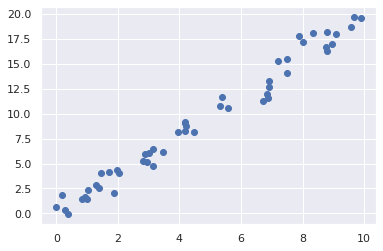

In [16]:
rnd = np.random.RandomState(1)
x = 10 * rnd.rand(50)
y = 2 * x - + rnd.randn(50)
plt.scatter(x, y)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [18]:
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [19]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

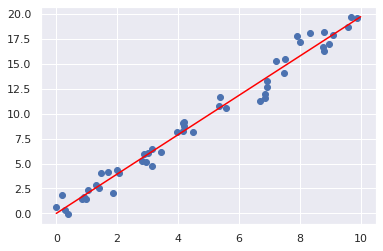

In [20]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

In [21]:
# угловой клэф. и сдвиг
print('Model slope {0}, intercept {1}'.format(model.coef_[0], model.intercept_))

Model slope 1.9727911896393042, intercept -0.001422914446793655


### Многомерные линейные модели

$y - a_0 + a_1 x_1 + a_2 x_2 + ...$

геометрически это подбор плоскости (для трехмерного) или гиперплоскости (для нескольких измеренеий), разделяющих точки.

In [22]:
X = 10 * rnd.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print('Model slope {0}, intercept {1}'.format(model.coef_, model.intercept_))

Model slope [ 1.5 -2.   1. ], intercept 0.49999999999999556


### Регрессия по комбинации базисных функций

$y - a_0 + a_1 x_1 + a_2 x_2 + ...$

где $x_n = f_n (x)$

например если $f_n = x^2$, то 

$y - a_0 + a_1 x + a_2 x^2 + a_3 x^3 ...$

При этом модель остается линейной  - угловые коэф. никогда не умножаются и не делятся друг на друга. Фактически мы выполняем проекцию одномерных данных на многомерное пространство.

#### Полиномиальные базисные функции

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# преобразуем одномерный массив в трехмерный
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [25]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

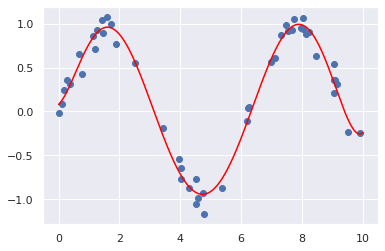

In [26]:
# аппроксимация синусоиды
x = 10 * rnd.rand(50)
y = np.sin(x) + 0.1 * rnd.randn(50)
xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

#### Гауссовы базисные функции

в базовый пакет не входят, напишем сами

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

(0.0, 10.0)

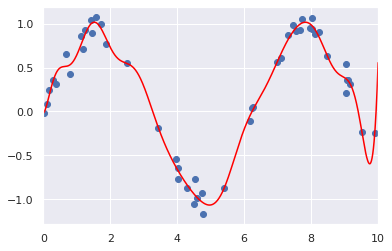

In [28]:
gaus_model = make_pipeline(GaussianFeatures(20),
                          LinearRegression())
gaus_model.fit(x[:, np.newaxis], y)
yfit = gaus_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlim(0, 10)

### Регуляризация

применение базисных функций приводит к быстрмоу переобучению. Чтобы избежать, применяется регуляризация

(-1.5, 1.5)

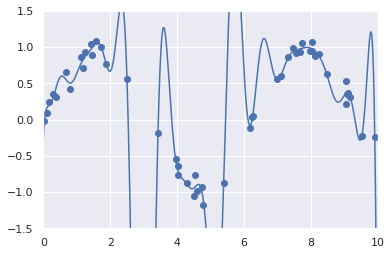

In [29]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

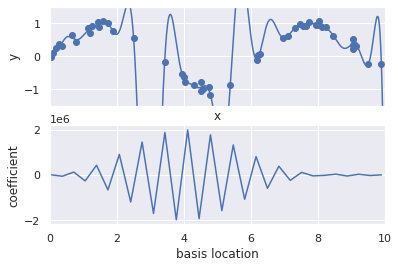

In [30]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

#### Гребневая регрессия (L2 регуляризация)

- ridge regression
- регуляризация Тихонова

штраф накладывается на сумму квадратов (евклидовой нормы) коэффиуиентов модели

$
P = \alpha\sum_{n=1}^N \theta_n^2
$

где $\alpha$ - параметр для управления уровнем штрафа. Когда -> 0, стандартная линейная регрессия. Когда -> inf, любой отклик модели подавляется

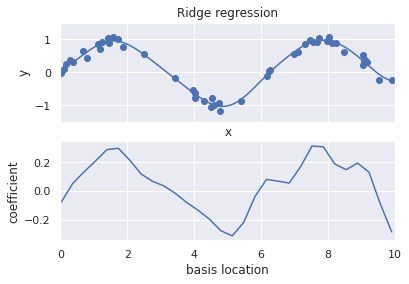

In [31]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30),
                     Ridge(alpha=0.1))
basis_plot(model, title='Ridge regression')

#### Ласс орегуляризация (L1 норма)

штрафуется сумма абсолютных значений коэфициентов модели

$
P = \alpha\sum_{n=1}^N |\theta_n|
$

По геометрическим причинам лассо регрессия любит разреженные модели, т.е. она по возможности делает коэффициенты равными 0

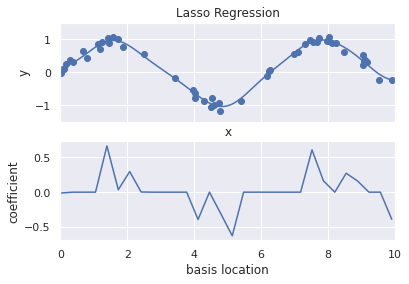

In [32]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

## Метод опорных векторов (и ядерные методы)

метод опорных веторов - относится к разделяющим методоам (discriminative). Вместо моделирования каждого из классов ищется многообразие, разделяющее классы друг от друга.

In [33]:
from scipy import stats

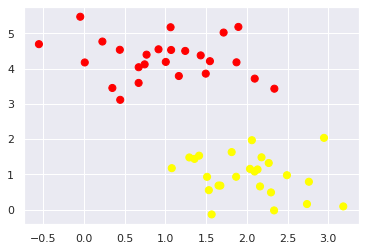

In [34]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

В данном случае линейный классификатор линию проведет, но нет единственной идеально разделяющей линии, т.к. нет критерия, определяющего такую линию.

(-1.0, 3.5)

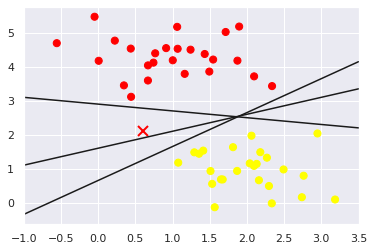

In [35]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Метод опорных векторов максимизирует отступ (margin). Метод опорных векторов пример оценивателяс максимальным отступом - maximum margin estimator

In [36]:
from sklearn.svm import SVC #SVR - регрессия
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [37]:
# функция для 2d визуализации границ для модели
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

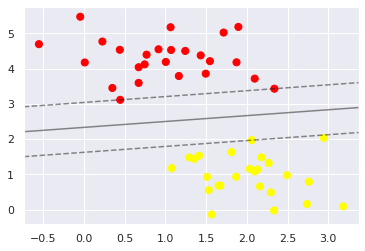

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='autumn')
plot_svc_decision_function(model)

Разделяющая линия максимизирует отступ между двумя блобами точек. Точки (в даннмо случае), которые лежат на границе отступа называются опорными векторами (support vectors). В sklearn данные хранятся по ссылке support_vectors_ классификатора

Важная особенность ядерных методов - удаленныен точки никак не влияют на аппроксимацию. Т.е. объем данных можно сократить с тем-же результатом

In [39]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

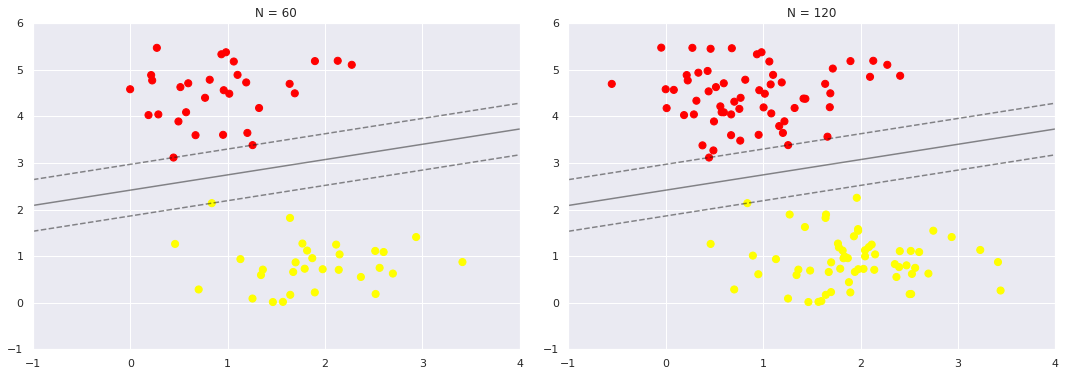

In [40]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [41]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

#### SVM-ядро

In [42]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

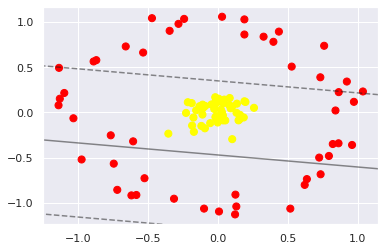

In [43]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

Как видно, линейно ядро не справляется с таким набором данных, т.к. они линейно не разделены. Если спроецировать эти данные на пространство большей размерности, данные могу отказаться линейно разделены. В данном случае одна из подходящих простых проекций - это RBF (вычисление радиальной базисной функции)

In [44]:
r = np.exp(-(X ** 2).sum(1))

In [45]:
# визуализация (не работает)
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.13877911e+00,  7.87163493e-02],
       [ 6.22015499e-01, -8.02224172e-01],
       [ 1.32864075e-01, -1.04088713e+00],
       [ 8.99921371e-03, -1.09635443e+00],
       [ 8.54888357e-02,  1.58856838e-01],
       [ 1.48634847e-01, -8.83549690e-02],
       [ 2.59231350e-01,  5.05497987e-02],
       [ 8.65256324e-01,  2.24022974e-01],
       [ 4.07052009e-02,  1.00473279e-01],
       [-7.73135468e-03, -7.35065577e-02],
       [-9.73733589e-01, -5.21043584e-01],
       [-8.87987822e-01,  5.63153585e-01],
       [ 7.35810779e-01, -6.84684098e-01],
       [-4.70505120e-01,  1.04216172e+00],
       [ 1.23965337e-01, -1.12876815e+00],
       [-1.13535022e+00,  4.92496218e-01],
       [-1.73782044e-01, -5.71599085e-02],
       [-5.82163806e-01, -9.13760830e-01],
       [ 8.40464061e-02,  7.85333128e-02],
       [ 2.28097377e-02,  2.89143268e-02],
       [ 3.08163836e-02,  1.05794045e+00],
       [ 1.64361093e-02, -6.79347772e-02],
       

Находить руками радиально-базисные функции сложно. Одна из стратегий - найти рад.базисные функции по каждой точке и отдать их в SVM. Эта стратегия называется kernel transformation (преобразование ядра) и основана на отноешнии подобия (или ядре) между каждой парой точек. Проблема этого метода - в вычислительной сложности. Для снижения сложности используется kernel trick, который помогает произвести преобразлование данных с помощью ядра неявно, не выстраивая полностю всего многомерного представления ядерной проекции.

In [46]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

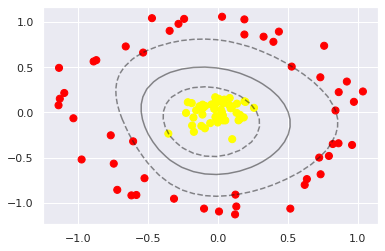

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=300, lw=1, facecolors='none')

Результатом является подходящая линейная граница решений.

#### Размытие отсупов

если данные перекрываются - используется гиперпараметр C, определяющий насколько далеко точки могут заходить внутрь отступа. C - ищется перекрестной проверкой.

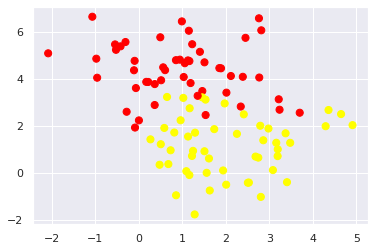

In [48]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

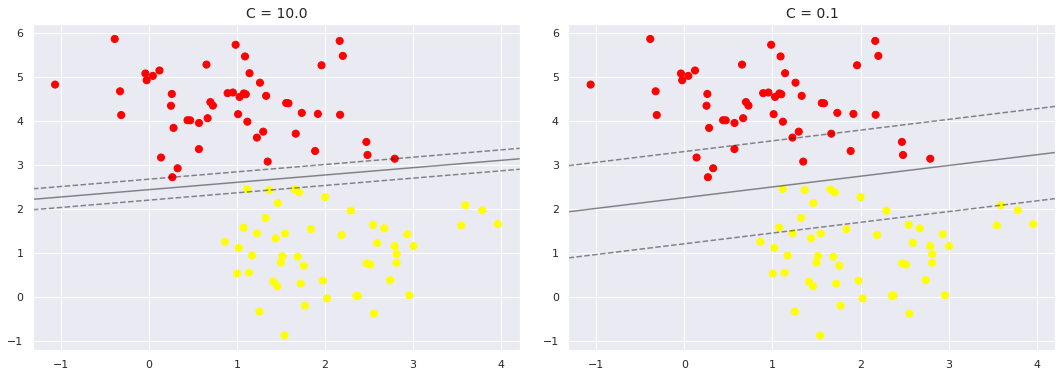

In [49]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Достоинства

- метод опорных векторов мало зависят от всех точек данных, мало потребляют оперативки
- быстро выдаю предсказания
- т.к. задействованы только точки возле отступа, хорошо подходят для многомерных данных
- разные ядра позволяют применять метод к разнообразным данным

Недостатки

- в худшем случае $O(N^3)$ или $O(N^2)$ для некоторых реализаций
- результаты зависят от удачного выбора размытия отступа C. Перекрестная проверка может быть дорогой.
- у результатов нет вероятностной интерпретации. Ее можно получить через внутреннюю перекреснтную проверку, но это тоже дорого.

В итоге SVM подходит только когда более простые методы не работают и есть ресурс процессора.

### случайный лес

сл.лес - пример ансамбля на основе деревьев решений. Сделаем решающее дерево

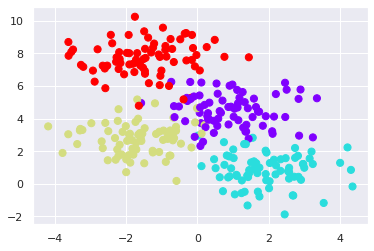

In [50]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [52]:
# функция для визуализации
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


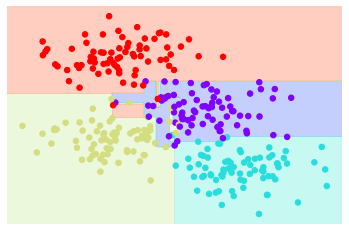

In [53]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Видно, что чем глубже дерево, тем более оно переобучено. Это свойственно всем деревьям. Чтобы избежать такой ситуации и используется лес - множество деревьев, обученных на разных подмножествах данных влияют на решение совместно.

Идея комбинации нескольких переобученных оценивателей для снижения эффекта этого переобучения лежит в основе метода ансаблей под названием "беггинг". В беггинге применяется усреднение результата переобученных моделей.

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


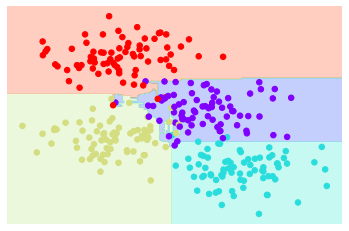

In [54]:
# беггинг вручную
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Обучение производилось на 80% обучающих точек. На практике обеспечивается стохастичность процесса - облучение производится на всех данных но с использованием различных стратегий выбора данных.

[подробнее](https://scikit-learn.org/stable/modules/ensemble.html)

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


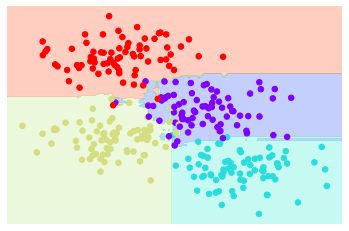

In [55]:
# беггинг из коробки с встроенной моделью рандомизации обучения
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

#### регрессия

<ErrorbarContainer object of 3 artists>

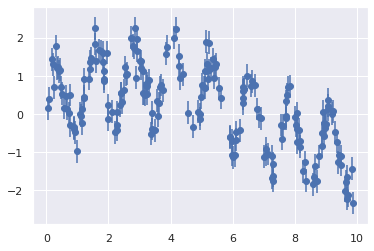

In [56]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

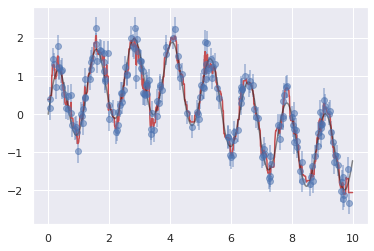

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5)

### Метод главных компонент

principal component analisis (PCA) - алгоритм понижения размерности. Может использоваться как инструмент визуализации, фильтрации шума, выделения и проектирования признаков и т.д.

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

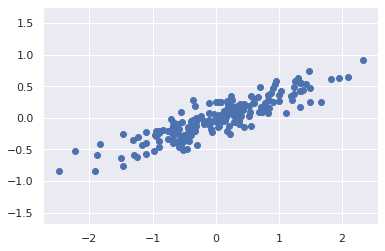

In [58]:
rnd = np.random.RandomState(1)
X = np.dot(rnd.rand(2, 2), rnd.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

В данном примере зависимость почти линейна. Метод главных компонент выполняет количественную оценку этих зависимостей путем нахождения списка главных осей координат и их использования для описания набора данных.

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [60]:
# компоненты
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [61]:
# объяснимая дисперсия (explainet variance)
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

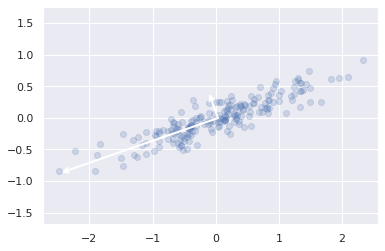

In [62]:
# визуализируем эти значения в виде векторов над входными данными
# компоненты задают направления векторов
# дисперсия - квадрат их длин
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

Векторы отображают главные оси координат данных, а длина векторов - степень важности этих векторов при описании распределения данных (мера дисперсии данных при проекции на данную ось).

Проекции точек данных на главные оси и есть главные компоненты. Это преобразование от осей кординат к главным осям представляет из себя афинное преобразование - оно состоит из сдвига (translation), вращения (rotation) и пропорционального масштабирования (uniform scaling).

![](img/PCA.png)

#### PCA для понижения размерности

обнуляется оддна или несколько наименьших главных компонент, в результьате данные проецируются на пространство меньшей размерности с сохранением максимальной дисперсии.

In [63]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

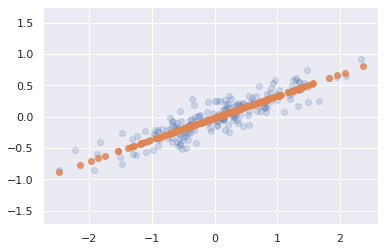

In [64]:
# данные стали одномерными - визуализируем их совместно с неизмененными данными (выполнив обратное преобразование)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

#### PCA для визуализации

на примере рукописных цифр. Данные состоят из изображений 8 х 8, т.е. 64-мерны. Сведем их в 2-х мерное пространство

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [66]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


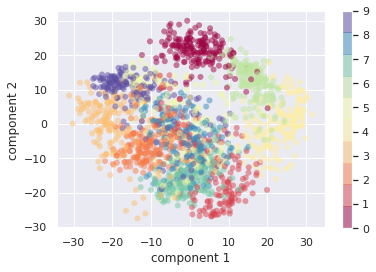

In [67]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Данная проекция показывает как цифры выглядят в двух измерениях, прчим сделали это методом без учителя.

### Объяснение компонент

каждое изображение в 64-мерном пространстве описывается вектором

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

т.е. для формирования каждого вектора необходимо умножить каждый элемент данного вектора на значение описываемого им пиксела, после чего сложить результаты

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

один из способов понизить размерность - это обнулить большую часть базисных векторов. Наивный подход; использовать только первые 8 пикселов (к примеру), остальные отбросить

![](img/digits-pixel-components.png)

Другой вариант - использовать другую базисную функцию.

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

pca выбирает оптимальные базисные функции, такие, чтобы комбинация лишь нескольких из них было бы достаточно для восстановления основной части элементов набора данных. Главные компоненты в даннмо контексте играют только роль коэффициентов, умеожаемым на каждый элемент вектора.

![](img/digits-pca-components.png)

В отличие от пиксельного базиса, PCA восстанавливает наиболее заметные признаки с помощью среднего значения из компонент (в примере их 8). Вклад каждого пиксела зависит от направления вектора.

#### Выбор количества компонент

делается с помощью представления интегральной доли объяснимой дисперсии в виде функции от количества компонент

Text(0, 0.5, 'cumulative explained variance')

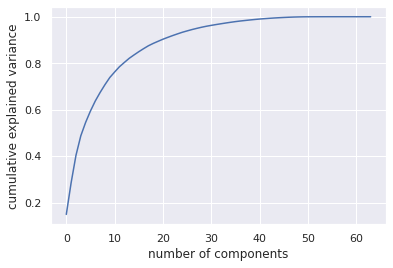

In [68]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Кривая демонстрирует количественную оценку содержания общей, 64-мерной, дисперсии в первых N-компонентах. В примере видно, что первые 10 компонент содержат 75% дисперсии, а для описания близкой к 100% дисперсии необходимо 50 компонент. Для сохранения 90% дисперсии необходимо 20 компонент. График позволяет определить присутствующий в множественных наблюдениях уровень избыточности.

#### PCA для фильтрации шума

идея состоит в следующем - шум должен мало влиять на компоненты с дисперсией, значительно превышающий его уровень. Восстановление данных с помощью лишь самого крупного подмножества главных компонент должно приводить к  относительному сохранению сигнала и отбрасыванию шума

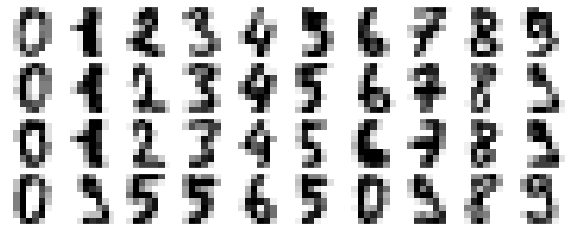

In [69]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

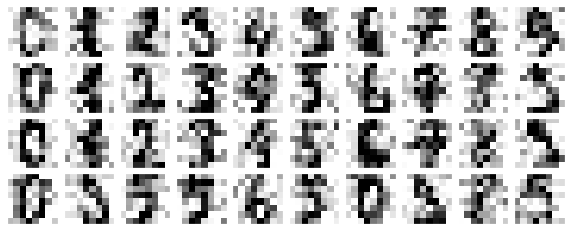

In [70]:
# случайный шум
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [71]:
# обучим PCA на зашумленных данных с сохранинием 50% дисперсии
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

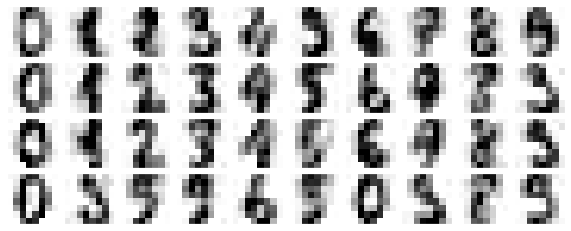

In [72]:
# вычисление 12 главных компонент через обратное преобразование
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Итог:
    
- pca отлично работает со многими многомерными данными

Недостаток - на него оказывает сильное влияние аномальные значения данных. В sklearn несколько ошибкоустойчивых pca.

### Обучение на базе многообразий

pca плохо работает, когда зависимости данных нелинейны. В этом случае используют обучение на базе многообразий (manifold learning). Это класс оценивателй без учителя, нацеленных на описание набора данных  как низкоразмерных многообразий, вложенных в пространство большей размерности.

рассмотрим многомерное масштабирование (MDS multydimensional scaling), локальное линейное вложение (LLE locally linear embedding) и изометрическое отображение (Isomap)

In [73]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

(-0.19972965643412033,
 4.195346643588747,
 0.019424089027564297,
 1.00023375581081)

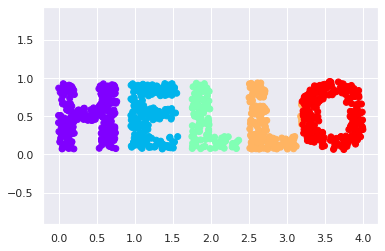

In [74]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

#### MDS

видно, что конкретное положение точек в x и y координатах не так важно - можно сжать/увеличить или повернуть изображение - надпись останется читабельной. В таком случае существенным является расстояние между каждой из точек и всеми остальными точками данных.

Для представления этого часто используют матрицу расстояний: для N точек создается массив N X N, где каждая позиция (i, j) содержит расстояние между точками i и j.

(4.5075861286085335, 8.843422456688193, 4.979887550043001, 7.269825545795252)

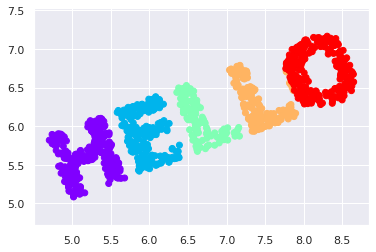

In [75]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

In [76]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

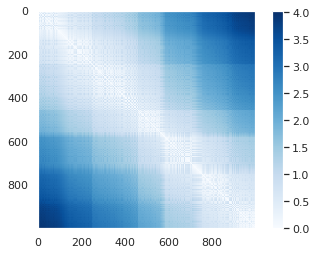

In [77]:
# результат
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [78]:
# при вращении изображения матирца не меняется
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

Вычисление матрицы задача нетривиальная, а вот обратное преобразование в координаты - сложная. Именно для этого используется MDS, алгоритм многомерного масштабирования - по заданной матрице восстанавливается D-мерное представление данных.

(-2.107894119080612,
 2.1463295776370446,
 -1.2702963324585892,
 1.2918301788213085)

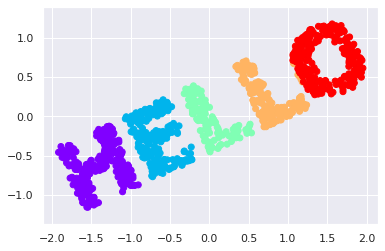

In [79]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

#### MDF для обучения

матрицы расстояний можно вычислять для любых размерностей. К примеру можно вмсесто вращения данных в 2-хмерном пространстве спроецировать их в трехмерное

In [80]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

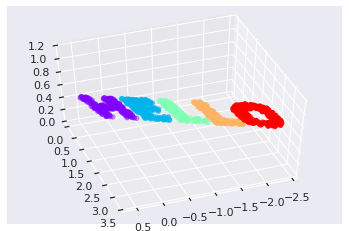

In [81]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

Теперь восстановим исходное 2-хмерное с помощью MDF

(-2.1078941190806133,
 2.1463295776370432,
 -1.2702963324585932,
 1.2918301788213098)

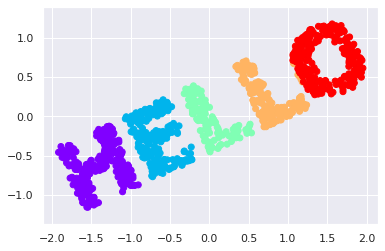

In [82]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

В итоге, MDF находит низкоразмерное представление данных. Однако MDF хорошо работает с линейными вложениями (вращения, сдвиги и масштабирования), однако с нелинейными MDF трепит неудачу.

пример - базовые зависимости сохранены, но данные свернуты в форму буквы S

In [83]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

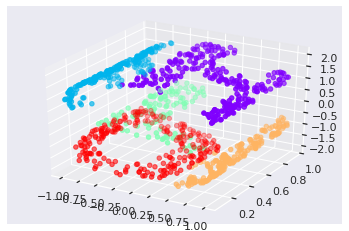

In [84]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize)

(-1.4671076909194065, 1.495942077942037, -2.309851622253017, 2.147946088353613)

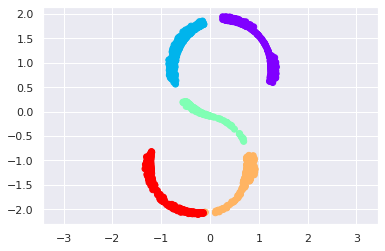

In [85]:
# MDS фейлит
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

#### LLE

Корень проблемы в том, что MDF пытется сохранить расстояния между удаленными точками как при формировании вложения. Можно изменить алгоритм так, чтобы расстояния сохранялись только между близлежащими точками.

LLE сохраняет расстояния только между соседними точками, в примере - к 100 соседним точкам

![(LLE vs MDS linkages)](img/LLE-vs-MDS.png)

(0.15, -0.15)

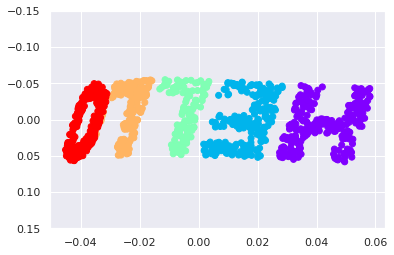

In [86]:
# восстановим данные с помощью модифицированного алгоритма LLE (работает хорошо при
# восстановлении хорошо структурированных многообразий с очень небольшой дисторсией)
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

Итог:

- методы на базе обучения многообюразий сложны в реализации
- нет удачного фреймворка дл обработки отсутствующих данных
- наличие шума сильно влияет на результат
- результат зависит от ичсла выбранных соседей и нет надежного способа количественной оценки этого ичсла
- сложно определить оптимальное кол-во измеренеий на выходе алгоритма
- смысл вложенных измеренеий не всегда понятен
- сложность $O(N^2) - O(N^3)$

единственно преимущество перед PCA - способность сохранять нелинейные зависимости в данных. 

Isomap работает лучше с реальными данными, чем LLE. Для сильно кластеризованных данных хорошо работает TSNE

### K-means (кластеризация)

к-средних ищет к-заранее заданных кластеров в немаркированном многомерном наборе данных. Центр кластера - арифметическое среднее всех точек. Каждая точка ближе к центру своего кластера, чем к центрам других кластеров.

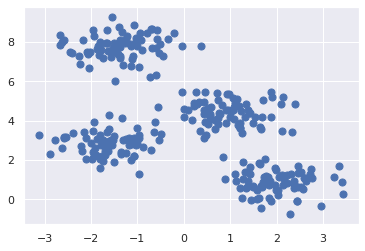

In [88]:
# сгенерим данные
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [89]:
# выделим 4 кластера
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

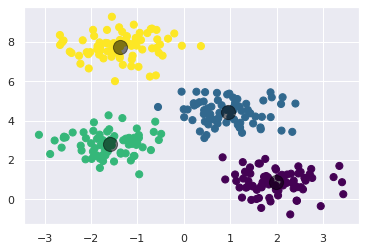

In [90]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

В k-means применяется алгоритм максимизации мат.ожидания (EM):

1. выдвигается гипотеза о центральности кластеров
2. повторяется до достижения сходимости:
- E-шаг - приписываем точки к ближайшим центрам кластеров
- M-шаг - задаем новые центры кластеров в соответствии со средним значсением

По сути максимизаци достигается простым усреднением данных в кластере.

Простейшая реализация k-means:

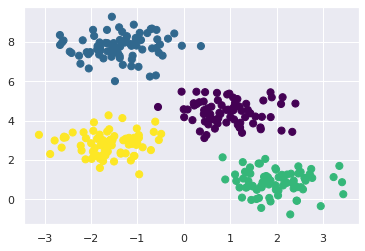

In [91]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

Нюансы:

- алгоритм может не привести к наилучшему (в глобальном смысле) результату
- колво кластеров придется выбрать заранее
- примененеие k-means ограничивается случаем линейных границ кластеров, что делает его неэффективным для более сложных границ
- k-means довольно медленный для большого числа выборок, т.к. на каждой итерации идет обращение к каждой точке данных (попытка решить эту проблему предпринимается в пакетных алгоритмах k-means)

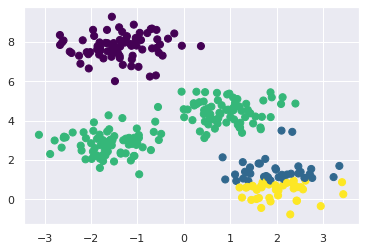

In [92]:
# другой рандомсид дает другой результат :(
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

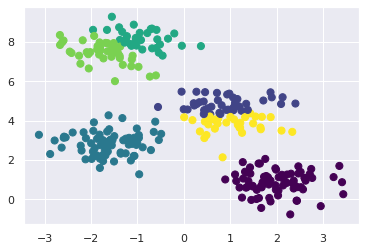

In [93]:
# неверное определение кол-ва кластеров
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

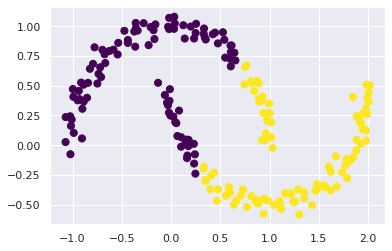

In [94]:
# линейные границы не справились
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


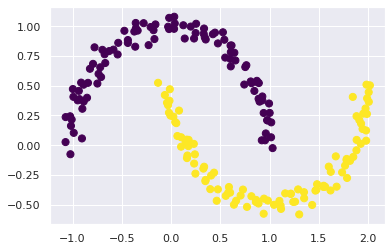

In [95]:
# используем spectral clustering - ядерный метод k-средних
# использует граф ближайших соседей для вычисления представления данных более высокой размерности
# после чего задает соответствие меток с помощью k-means
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

### GMM (смеси Гауссовых распределений)

невероятностная природа k-means и использования им простого расстояния от центра кластера приводит к тому, что он не применим для большинства случаев. В k-means отсутствует внутрненняя мера вероятности или достоверного отнесения точек к кластерам. Модель можно рассматривать как набор гиперсфера с центрами в центрах кластеров и радиусом, соответствующем наибольшему расстоянию до самой удаленной точки кластера. Этот радиус задает жесткую границу соответствия точки кластеру в обучающей последовательности - всё что снаружи не относится к кластеру.

In [96]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [98]:
# случайеные данные
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] 

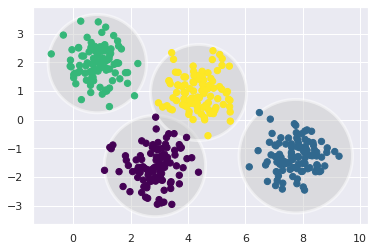

In [99]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

k-means не умеет радотать с овальными или элиптическими кластерами.

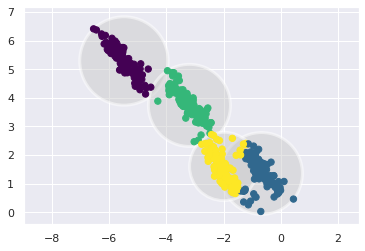

In [100]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

В данном примере форма кластеров не сферическая, а значит сфера плохо подходит для описания икластеризации данных. Метод пытается втиснут ьв сферы расположенные близко кластера, что приводит к путанице меток. Эту проблему можно решить с помощью пред.обработки в PCA или через многообразия, но нет никаких гарантий, что подобная глобалдьная операция позволит разместить точки данных внутри сферы.

GMM (gaussian mixture model) нацелена на поиск многомернызх гауссовых распределений вероятностей, моделирующих наилучшим обрпазом любой исходный набор данных. GMM в т.чя. можно использовать для поиска кластеров

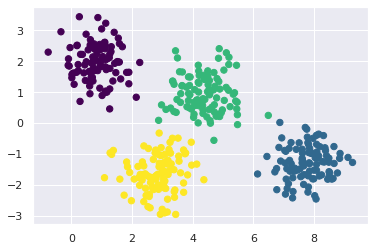

In [102]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

т.к. модель содержит вероятностную модель, то можно присваиват ьметки классов на вероятностной освнове

In [103]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.463 0.537 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]]


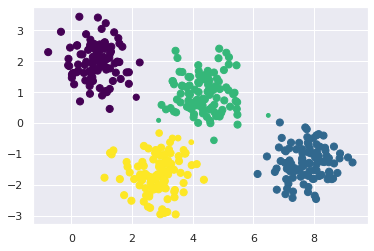

In [104]:
# зададим размер точек на визуализации, соответствующий вероятности метки
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

GMM делает следующее:

1. выбирает первоначальные гипотезы для расположения и формы кластеров
2. повторяет до достижения сходимости:
- E-шаг - для каждой точки находит веса, кодирующие вероятность ее принадлежности к каждому классу
- M-шаг - для каждого кластера корректирует его расположение, нормализацию и форму на основе инфы обо всех точках с учетом весов.

Результат - каждый кластер связан не со сферой с четкой границей, а с гладкой Гауссовой моделью.

In [108]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

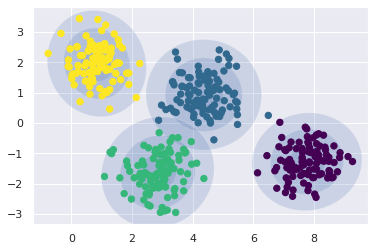

In [109]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

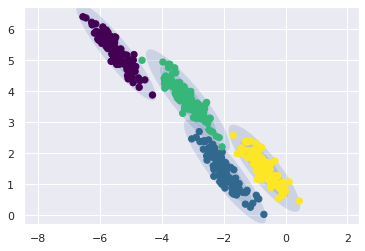

In [110]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)